# HW5

##### PHYS434 - Advanced Laboratory: Computational Data Analysis
##### Professor: Miguel Morales
<br>

##### Due date: 11/18/2021
##### By Erik Solhaug
<br>

In [1]:
# Importing needed libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats, signal

# This sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)
# This sets the fontsize of the x- and y-labels
fsize = 30

## Problem 1

First start by throwing a signal-free background. For Problem 1 choose a Normal distribution with some modest 𝜎, say in the range 2-5. Create a million background events.

Now we need to make some signal. Let us choose to make signals of random strength on the interval of 0-20. Now it is critically important that you throw these using a uniform distribution. A uniform distribution means that the signal is equally likely to be small/faint (near zero) as large/bright (near 20). Mathematically this is the $P(signal)$ in the equation. If you use another way of simulating signals that does not have a uniform distribution, you are injecting an implicit prior (very, very bad).

Now add your signal to your background to create fake data readings. Since you know what the true signal was for each data reading, and you used a flat prior, you now have $P(data|signal) P(signal)$.

Now make one of the 2D histograms as shown in class. Here we want to histogram the signal vs. the simulated data readings. There are a couple of ways to do this, but it will be easier later if you define your bin edges explicitly, make a histogram, then plot it. Here is the code I used for the plot in class:

This should get you a plot like below.

<ipython-input-2-1656368399cb>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


Text(0.5, 0, 'Observed data, $P(d|s)$')

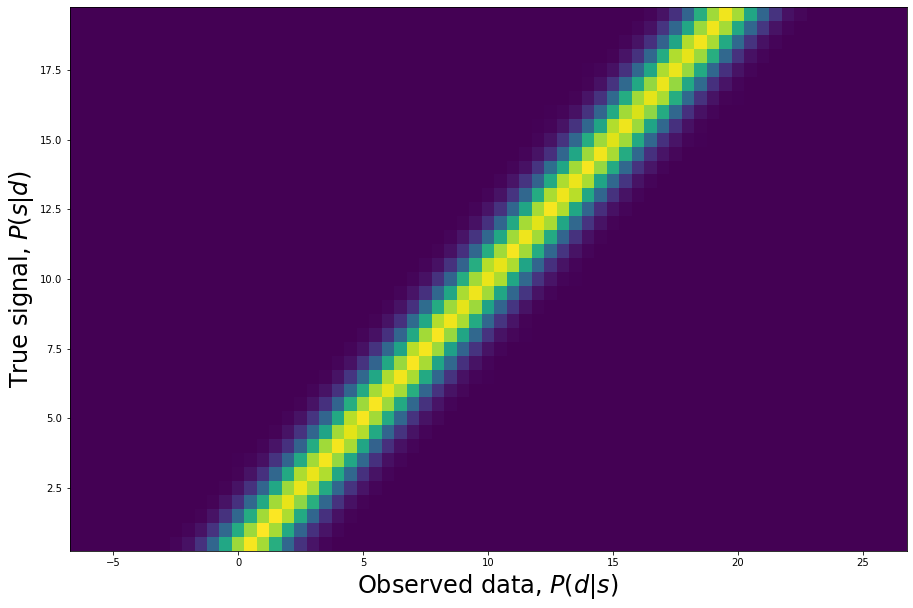

In [2]:
bkgd = stats.norm.rvs(loc=0, scale=1, size = 1000000)

signal = stats.uniform.rvs(loc=0, scale=20, size = 1000000)

data = bkgd + signal

signaledges = np.linspace(0,20,41)
dataedges = np.linspace(-7,27,69)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

Now to explore this we can take slices of the above. We can look at our array edges and pick a vertical or horizontal stripe.

## Problem 1b

Select a true injected signal and plot $P(d|s)$. (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it. [Hint: this was also shown in class.]

In [3]:
Psd.shape

(68, 40)

In [4]:
Psd.T[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       4.0000e-06, 4.0000e-06, 2.8000e-05, 2.6400e-04, 9.2800e-04,
       2.8240e-03, 6.5680e-03, 1.1992e-02, 1.7128e-02, 1.9796e-02,
       1.7408e-02, 1.2604e-02, 6.5960e-03, 2.8480e-03, 1.0240e-03,
       2.6800e-04, 4.0000e-05, 8.0000e-06, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00])

We select a signal of **12**.

In [5]:
slice_loc = 12

idx = np.argwhere(temp2 == slice_loc)[0]
temp2[idx][0]

12.0

Sum: 0.9915846300412829


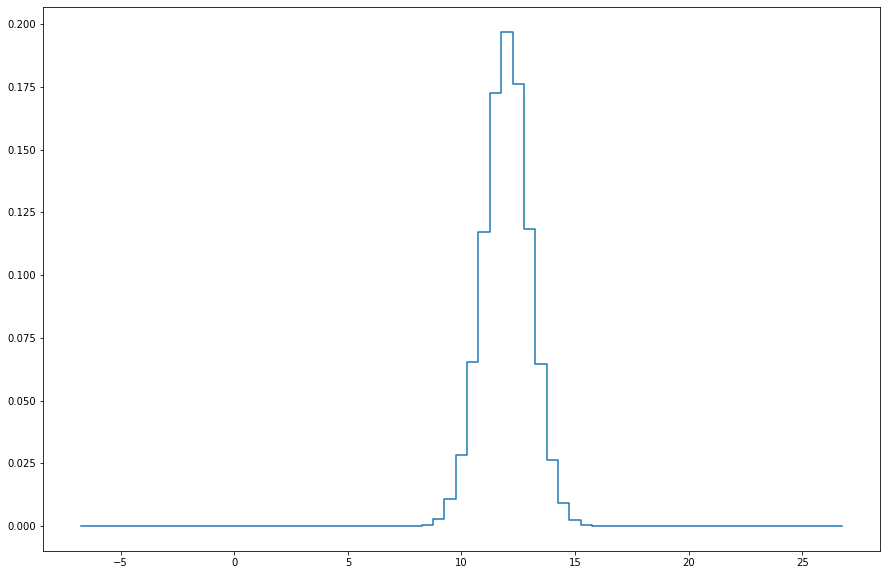

In [6]:
norm_factor = 1/sum(Psd.T[slice_loc])

plt.step(datacenters, Psd[:, idx]*norm_factor)
print(f'Sum: {(sum(Psd[:, idx]*norm_factor))[0]}')

## Problem 1c

Select an observed data value and plot $P(s|d)$. (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

We need to find $P(signal)$ and $P(data)$.

In [7]:
# mean_loc = np.mean(Psd[:, idx])
# mean_loc

In [8]:
slice_loc2 = 15

idx = np.argwhere(temp == slice_loc2)[0]
temp[idx][0]

15.0

Sum: 0.0


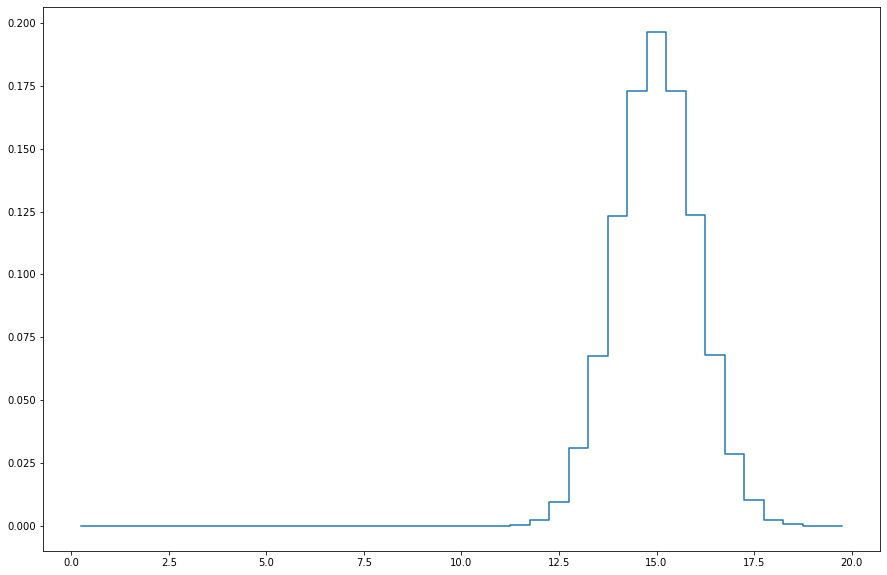

In [9]:
norm_factor = 1/sum(Psd.T[slice_loc2])

plt.step(signalcenters, Psd[idx, :][0]*norm_factor)
print(f'Sum: {(sum(Psd[idx, :]*norm_factor))[0]}')

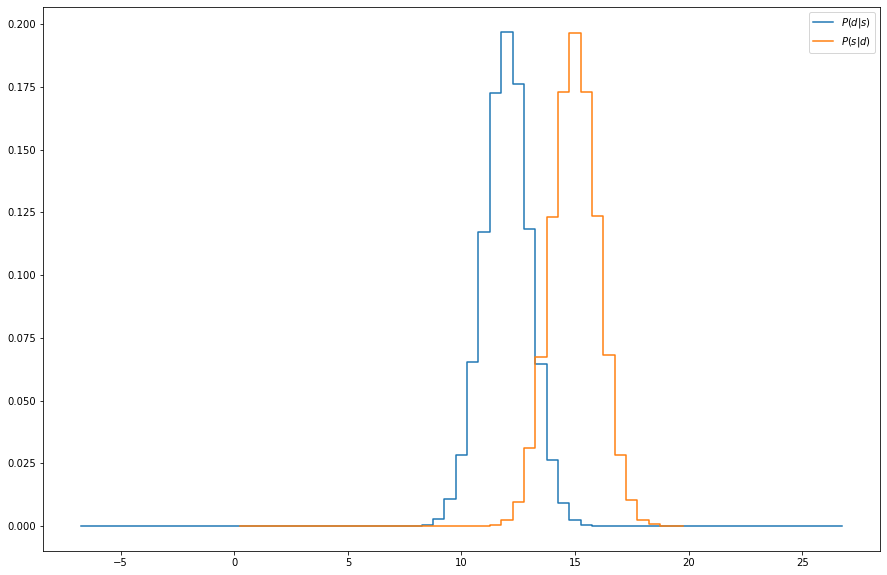

In [10]:
# First slice
idx = np.argwhere(temp2 == slice_loc)[0]
norm_factor = 1/sum(Psd.T[slice_loc])

plt.step(datacenters, Psd[:, idx]*norm_factor, label = '$P(d|s)$')

# Second slice
idx = np.argwhere(temp == slice_loc2)[0]
norm_factor = 1/sum(Psd.T[slice_loc2])

plt.step(signalcenters, Psd[idx, :][0]*norm_factor, label = '$P(s|d)$')

plt.legend()

<ipython-input-11-0130d58b9f7b>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


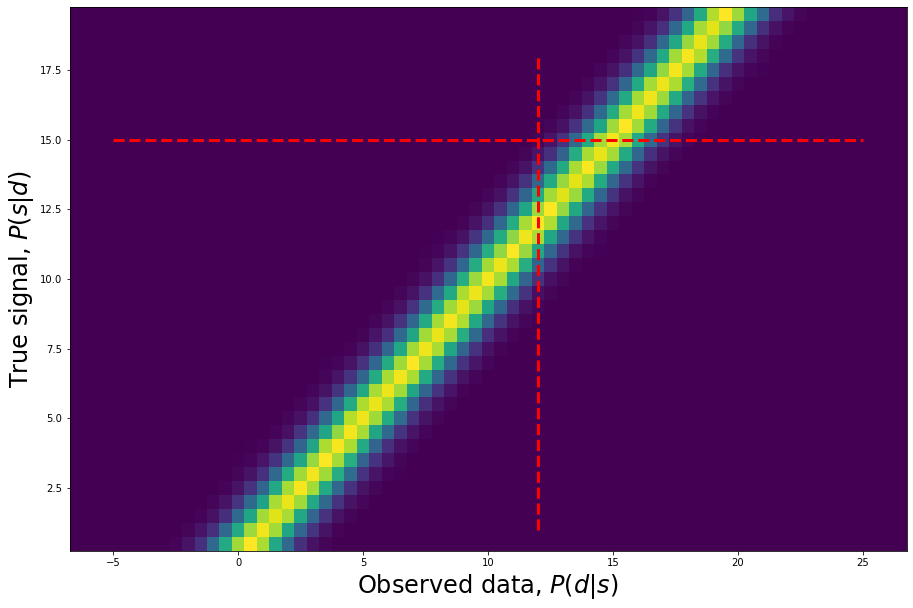

In [11]:
bkgd = stats.norm.rvs(loc=0, scale=1, size = 1000000)

signal = stats.uniform.rvs(loc=0, scale=20, size = 1000000)

data = bkgd + signal

signaledges = np.linspace(0,20,41)
dataedges = np.linspace(-7,27,69)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.vlines(slice_loc, ymin=1, ymax=18, color='r', linestyle = '--', linewidth = 3)
plt.hlines(slice_loc2, xmin=-5, xmax=25, color='r', linestyle = '--', linewidth = 3)

## Problem 2

Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Gaussian distribution but with a non-zero mean. [Hint: move it by at least a couple of $\sigma$]. Reproduce the graphs above. Lastly overplot the $P(d|s)$ and $P(s|d)$ plots. Why are they not centered on the same value? Explain carefully.

In [12]:
slice_loc = 12
slice_loc2 = 15

<ipython-input-13-da38677211e0>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(datacenters,signalcenters,Psd.T)


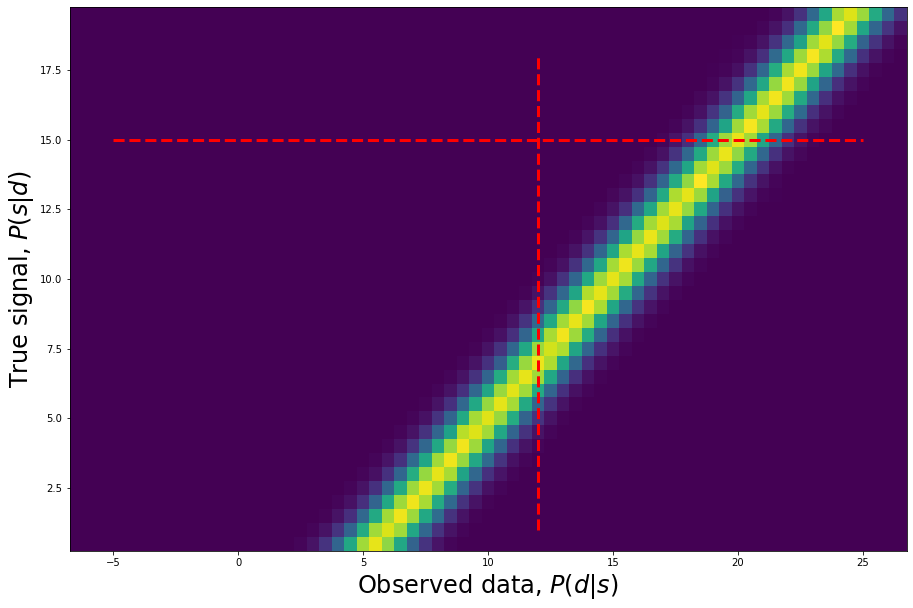

In [13]:
bkgd = stats.norm.rvs(loc=5, scale=1, size = 1000000)

signal = stats.uniform.rvs(loc=0, scale=20, size = 1000000)

data = bkgd + signal

signaledges = np.linspace(0,20,41)
dataedges = np.linspace(-7,27,69)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.vlines(slice_loc, ymin=1, ymax=18, color='r', linestyle = '--', linewidth = 3)
plt.hlines(slice_loc2, xmin=-5, xmax=25, color='r', linestyle = '--', linewidth = 3)

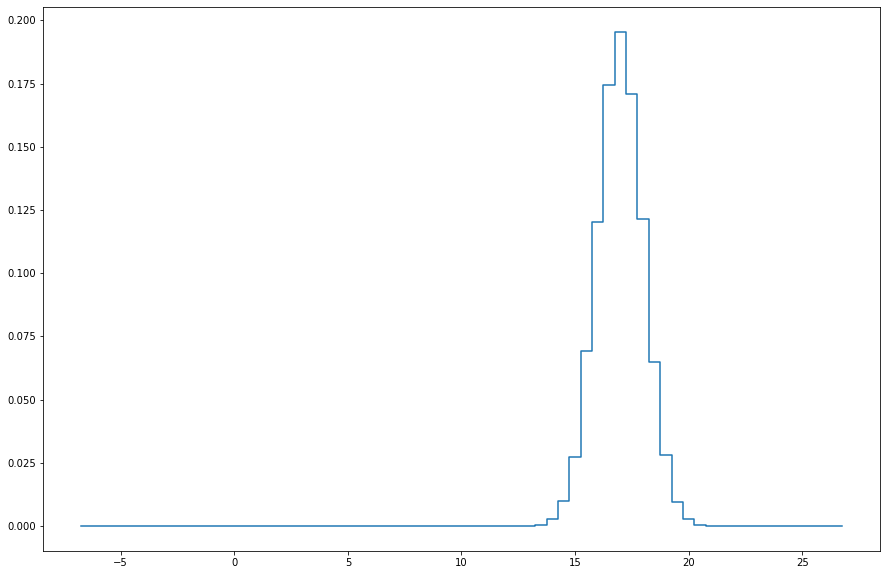

In [14]:
idx = np.argwhere(temp2 == slice_loc)[0]
norm_factor = 1/sum(Psd.T[slice_loc])

plt.step(datacenters, Psd[:, idx]*norm_factor)

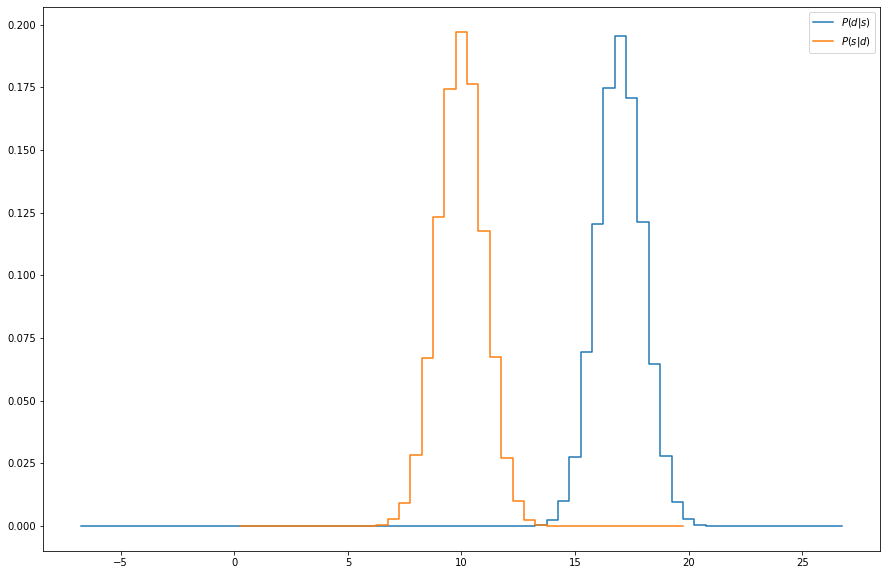

In [15]:
# First slice
idx = np.argwhere(temp2 == slice_loc)[0]
norm_factor = 1/sum(Psd.T[slice_loc])

plt.step(datacenters, Psd[:, idx]*norm_factor, label = '$P(d|s)$')

# Second slice
idx = np.argwhere(temp == slice_loc2)[0]
norm_factor = 1/sum(Psd.T[slice_loc2])

plt.step(signalcenters, Psd[idx, :][0]*norm_factor, label = '$P(s|d)$')

plt.legend()

The slices shifts by the mean and this happens in different directions. Although I used the same exact values for my slices, one can see that $P(d|s)$ shifts to the right and $P(s|d)$ shifts to the left. This, is because the new background has a different mean and will thus shift the $P(d|s)$ 'towards' a higher count-value and $P(s|d)$ towards a lower count value as we can see in the above 2D-histogram plots with corresponding dashed slice-lines.